In [23]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import random
from collections import Counter 

In [2]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [3]:
dataset.columns=['Index','Source','Target']

In [4]:
# check if index columns has unique values
print(len(dataset.Index))
print(len(set(dataset.Index)))

483094
483094


In [5]:
dataset.set_index('Index' , inplace = True)
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


#### Associate single category to each node

In [6]:
# all nodes in and out
unique_nodes = set(set(dataset.Source).union(set(dataset.Target)))
n_nodes = len(unique_nodes)
n_edges = len(dataset)

In [8]:
category_file = 'wiki-topcats-categories.txt'

In [55]:
categories = {v: [] for v in unique_nodes}
categories_to_nodes = {} # mantiene la struttura originale del file catgoria -> nodi
lost = []

with open(category_file) as file:
    for i in range(17364):
        line = file.readline()
        category = line.split(';')[0].split(':')[-1]
        nodes = line.split(';')[1].split(' ')[1:-2]
        existing_nodes = []
        
        for node in nodes:
            try:
                categories[int(node)].append(category)
            except:
                lost.append(int(node))
            
            if int(node) in unique_nodes:
                existing_nodes.append(node)
        
        if existing_nodes != []:    
            categories_to_nodes[category] = existing_nodes


In [10]:
categories_filtered = {}
for n in categories.keys():
    try:
        rand_category = random.choice(categories[n])
        categories_filtered[n] = rand_category
    except:
        categories_filtered[n] = None

#### Create graph

In [11]:
in_links = {v: [] for v in set(dataset.Source)}
out_links = {v: [] for v in set(dataset.Target)}

for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_links[source].append(target)
    out_links[target].append(source)

In [12]:
links = in_links.copy()

In [13]:
links.update(out_links)

In [14]:
len(links)

98343

In [15]:
n_art_outlink = len(out_links)
n_art_inlink = len(in_links)

#### Check if directed

In [17]:
directed = False
for node in in_links:
    if len(set(in_links[node]).intersection(set(out_links[node]))) != 0:
        directed = True
        break
if directed:
    print('Graph is directed')
else:
    print('Graph is undirected')

Graph is directed


#### Density

In [20]:
density = (n_edges/(n_nodes*(n_nodes-1)))
density

4.9951571365597335e-05

In [21]:
avarage = n_edges/n_nodes
avarage

4.912337431235573

#### Visualize the nodes' degree distribution

In [22]:
my_len = [] 
for node in links.keys():
    my_len.append(len(links[node]))

# dictionary with degree
node_degree = dict(zip(links.keys(), my_len))
d = Counter(node_degree)

In [24]:
# degree distribution
counter_supp = list()
for i in range(1, max(my_len)):
    counter_supp.append(my_len.count(i))

In [25]:
# cumulative degree ditribution
counter = [0]
for i in range(1, max(my_len)):
    counter.append(counter[-1]+my_len.count(i))

In [156]:
len(counter)

10815

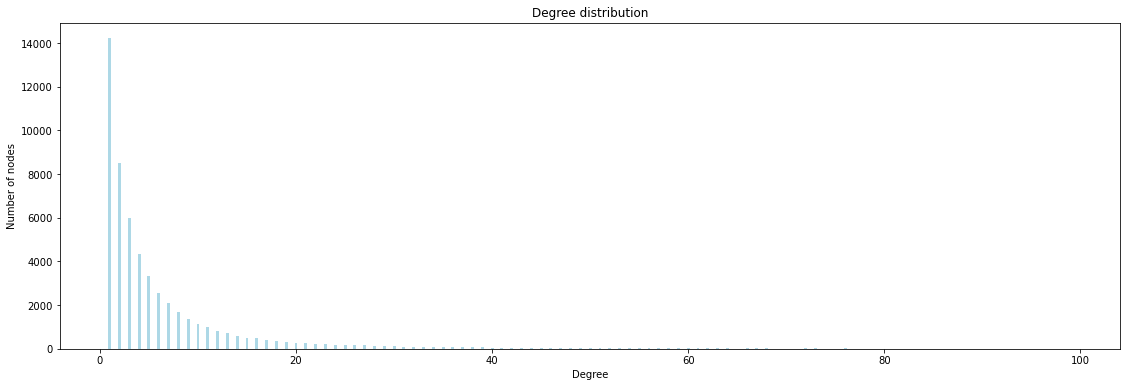

In [162]:
plt.figure(figsize = (19,6))
plt.bar(x = list(range(1,len(counter_supp[1:100])+1)),height = counter_supp[1:100],color = 'lightblue',width = 0.3);
#plt.plot(counter[1:100],color = 'lightblue');
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.title('Degree distribution')
plt.show()

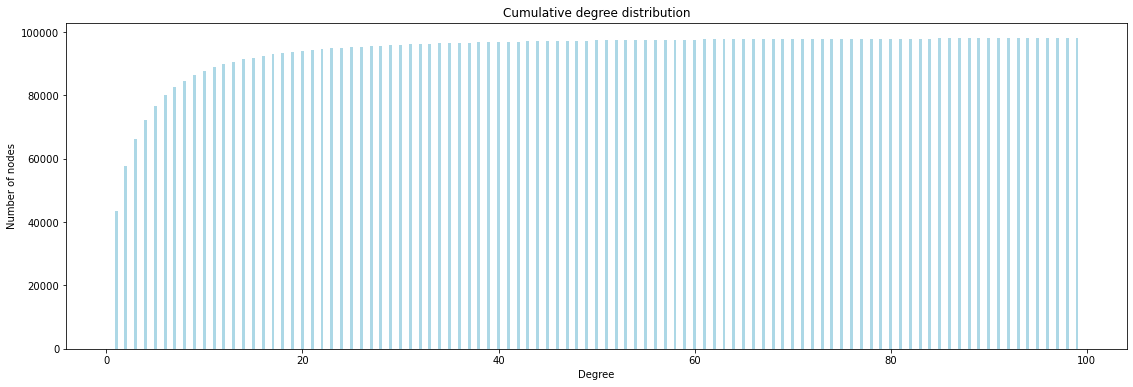

In [160]:
plt.figure(figsize = (19,6))
plt.bar(x = list(range(1,len(counter[1:100])+1)),height = counter[1:100],color = 'lightblue',width = 0.3);
#plt.plot(counter[1:100],color = 'lightblue');
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.title('Cumulative degree distribution')
plt.show()

### Useful Functions

In [132]:
def shortest_path (node1,node2):
    out_nodes = set(out_links[node1]) # set of outnodes of node 1
    explored = set() # initializing explored nodes set
    clicks = 1  # number of clicks is set to the minimum distance from node 1 to node 2
    while node2 not in out_nodes and out_nodes != set(): # until we don't find node 2 and until the new set of out-nodes to explore is non-empty 
        new_out_nodes = set() 
        for node in out_nodes:  # we iterate through unexplored nodes
            try:
                new_out_nodes = new_out_nodes.union(set(out_links[node])) # if the node is a key in out_links, we add the set of nodes associated to it 
            except:
                continue
        explored = explored.union(out_nodes) # we update the set of explored nodes
        out_nodes = new_out_nodes.difference(explored) # we keep only the nodes that have not been explored jet and update out_nodes
        clicks += 1 # we increase distance
    return clicks

In [163]:
# esempio
node1 = 1062426
node2 = 787822
shortest_path(node1,node2)

16